In [24]:
import numpy as np
import scipy
from scipy import signal
from matplotlib import pyplot as plt
import os

## File naming

Describe the file names and what they tell us.

In [3]:
PATH = "../../data/"

In [4]:
files = [file for file in os.listdir(PATH) if file.endswith(".bin")]
files

['nfc-3.0-1.bin',
 'nfc-2.0-2.bin',
 'fm-100.3.bin',
 'nfc-3.0-antenna-1.bin',
 'nfc-3.0-2_lowpassed.bin',
 'nfc-2.0-1.bin']

## Parse file

To parse the file, several element must be taken into account. First, the type of the data in the binary file. Here, we recorded our data as `complex64` values, so we must read them as such as well.

Second, the same sample rate used to record the signal must be used her as well.

In [14]:
samp_rate = 2e6
nfft = 1024

In [6]:
file = files[3]
data = np.fromfile(os.path.join(PATH, file), dtype=scipy.complex64)

#for file in files:
    #sample_rate, data = wav.read(os.path.join(PATH, file))
    #all_X[file[:-4]] = (sample_rate, data)

## Visualize

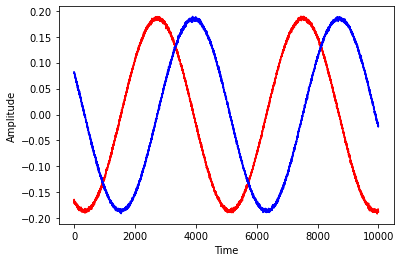

In [20]:
plt.plot(np.real(data[0:int(1e4)]), 'r-', np.imag(data[0:int(1e4)]), 'b-')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

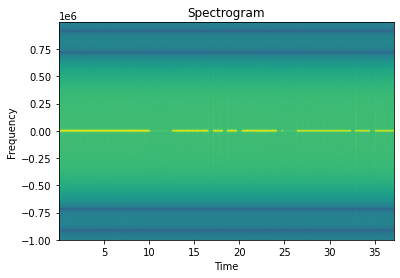

In [11]:
plt.specgram(data, NFFT=nfft, Fs=samp_rate)
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

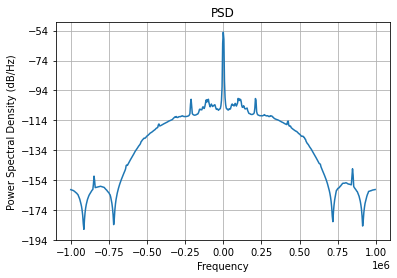

In [12]:
plt.psd(data, NFFT=nfft, Fs=samp_rate)
plt.title("PSD")
plt.show()

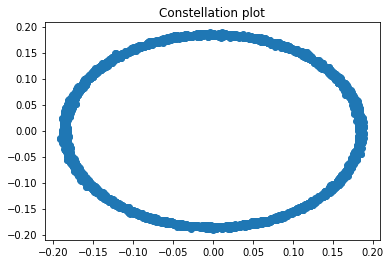

In [31]:
plt.scatter(np.real(data[0:int(1e4)]), np.imag(data[0:int(1e4)]))
plt.title("Constellation plot")
plt.show()

## Continuous wavelet transform

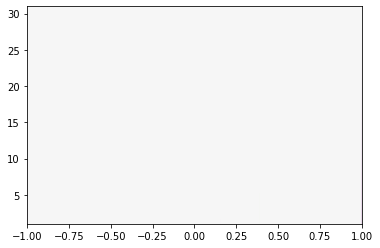

In [26]:
widths = np.arange(1, 31)
cwt = signal.cwt(np.real(data[0:int(1e5)]), signal.ricker, widths)
plt.imshow(cwt, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwt).max(), vmin=-abs(cwt).max())
plt.show()